# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-05-13.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-05-12,2024-05-13,765.162215,794.738781,758.432278,786.253298,9.331902e+10,1.635644e+11
1,2024-05-11,2024-05-12,724.398667,795.178822,721.563159,760.759065,1.361883e+11,1.596975e+11
2,2024-05-10,2024-05-11,739.417949,800.692547,707.797596,719.319684,1.277384e+11,1.561841e+11
3,2024-05-09,2024-05-10,708.778239,757.156844,708.446038,744.046408,1.157283e+11,1.499111e+11
4,2024-05-08,2024-05-09,783.298361,784.752847,690.718804,708.496971,1.322596e+11,1.544619e+11


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-05-12,2024-05-13,765.162215,794.738781,758.432278,786.253298,9.331902e+10,1.635644e+11
1,2024-05-11,2024-05-12,724.398667,795.178822,721.563159,760.759065,1.361883e+11,1.596975e+11
2,2024-05-10,2024-05-11,739.417949,800.692547,707.797596,719.319684,1.277384e+11,1.561841e+11
3,2024-05-09,2024-05-10,708.778239,757.156844,708.446038,744.046408,1.157283e+11,1.499111e+11
4,2024-05-08,2024-05-09,783.298361,784.752847,690.718804,708.496971,1.322596e+11,1.544619e+11
...,...,...,...,...,...,...,...,...
289,2023-07-28,2023-07-29,272.412629,293.106284,270.623024,292.196668,6.144979e+10,2.986835e+10
290,2023-07-27,2023-07-28,294.276033,302.620373,274.856671,276.183124,9.694813e+10,3.038774e+10
291,2023-07-26,2023-07-27,300.593491,328.818293,288.924853,295.806895,1.937506e+11,3.235939e+10
292,2023-07-25,2023-07-26,285.010733,316.747323,251.598869,299.798447,1.777222e+11,2.956506e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,294,294,294.000000,294.000000,294.000000,294.000000,2.940000e+02,2.940000e+02
mean,2023-12-17 12:00:00,2023-12-18 12:00:00,465.668889,495.312674,441.766242,467.501196,9.082237e+10,6.761172e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,132.592704,136.389706,128.023607,132.383912,1.148893e+10,1.731861e+10
25%,2023-10-05 06:00:00,2023-10-06 06:00:00,232.883231,240.944178,222.084983,233.005449,2.984828e+10,2.769024e+10
50%,2023-12-17 12:00:00,2023-12-18 12:00:00,322.133279,336.482916,310.028880,323.379428,5.327106e+10,3.837921e+10
75%,2024-02-28 18:00:00,2024-02-29 18:00:00,646.346266,677.116750,607.161784,648.061252,1.030183e+11,1.220112e+11
max,2024-05-12 00:00:00,2024-05-13 00:00:00,1532.731309,1547.556307,1237.298791,1521.231421,5.841196e+11,1.972445e+11
std,NaN,NaN,321.355976,344.145396,299.641779,321.490257,1.026437e+11,5.598762e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       294 non-null    datetime64[ns]
 1   End         294 non-null    datetime64[ns]
 2   Open        294 non-null    float64       
 3   High        294 non-null    float64       
 4   Low         294 non-null    float64       
 5   Close       294 non-null    float64       
 6   Volume      294 non-null    float64       
 7   Market Cap  294 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 18.5 KB


### EDA

c:\Users\Randell\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


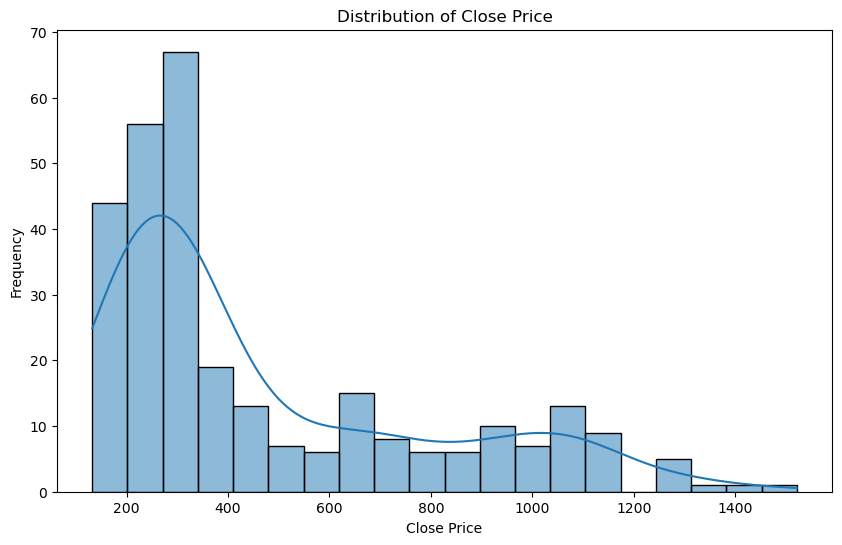

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

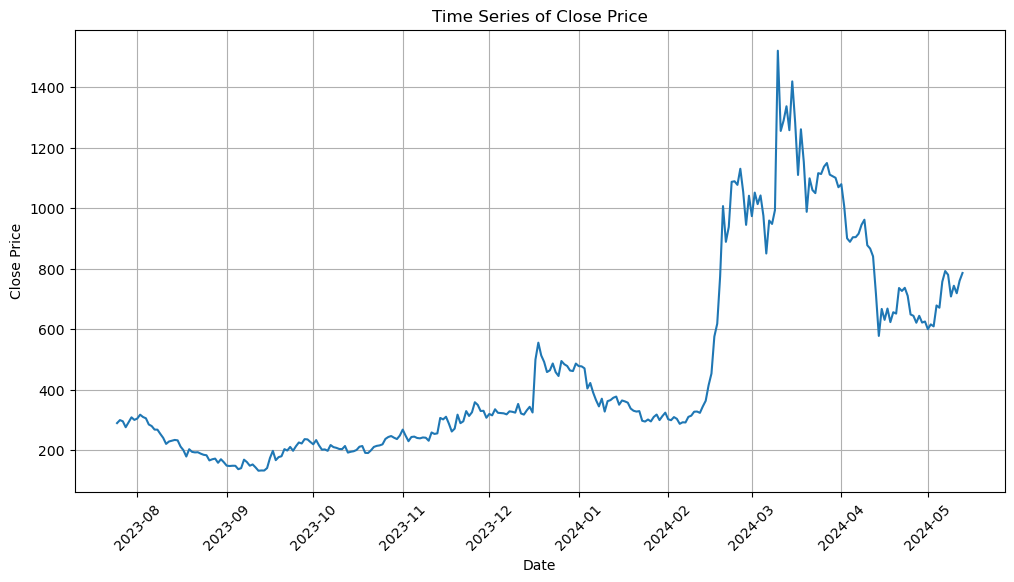

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 1164.0841842666464


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 492.37469621517477
Gradient Boosting Mean Squared Error: 1067.5454705802308
Support Vector Regressor Mean Squared Error: 133072.2192991258


### Testing the models

In [13]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [638.97477237]


In [ ]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:
Predicted Close Price: [1034.3342983]
